Importing the Dependencies

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir('data/with_mask')
print(with_mask_files[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [3]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[0:5])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [4]:
print('Number of with mask iamges :', len(with_mask_files))
print('Number of without mask images',len(without_mask_files))

Number of with mask iamges : 3725
Number of without mask images 3828


**Creating Labels for two class of Images**

with mask --> 1

without mask --> 0

In [5]:
#Create the labels
with_mask_labels = [1]*len(with_mask_files)

without_mask_labels = [0]*len(without_mask_files)

In [6]:
labels  = with_mask_labels + without_mask_labels

**Displaying the images**

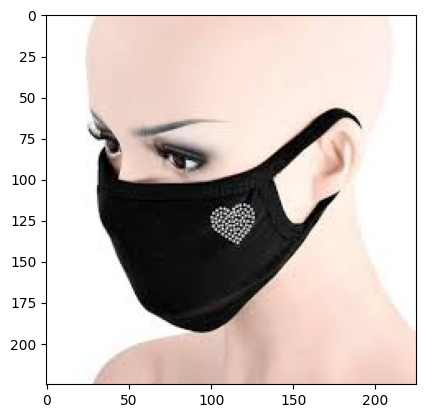

In [7]:
#Displaying with mask image
img = mpimg.imread('data/with_mask/with_mask_2375.jpg')
imgplot = plt.imshow(img)
plt.show()

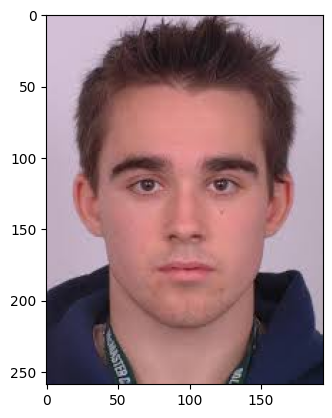

In [8]:
#Displaying without mask image
img = mpimg.imread('data/without_mask/without_mask_2375.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Preprocessing**

1. Resize the images

2. Covert images into numpy arrays

In [9]:
#Convert images to numpy arrays+

with_mask_path = 'data/with_mask/'

data = []

for image_file in with_mask_files:
    image = Image.open(with_mask_path + image_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    

without_mask_path = 'data/without_mask/'

for image_file in without_mask_files:
    image = Image.open(without_mask_path + image_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)    

c:\Users\chait\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
#Converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [11]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


***Train Test Split***

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
#Scaling the data to keep range of values in [0, 1]
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building the Conventional Neural Network**

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.conv2D(32, kernel_size=(3,3),activation='relu',input_size=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.conv2D(64, kernel_size=(3,3),activation='relu',input_size=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

AttributeError: module 'tensorflow.keras.layers' has no attribute 'conv2D'